In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/UCMF.csv')
data.index = data['ID']
data = data.drop('ID', axis=1)

In [4]:
data.head()

,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
ID,,,,,,,,,,,,,,,,,,,,
1,5.0,51,19.0,11/05/06,30/03/06,0.12,GS,Normais,NaN,NaN,Não Calculado,Anormal,Normal,Sistólico,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
2,3.5,50,14.0,25/05/05,19/05/05,0.02,GS,Normais,NaN,NaN,Não Calculado,Anormal,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
3,0.0,0,NaN,12/06/01,08/05/05,-4.05,SULA,Normais,NaN,NaN,Não Calculado,Anormal,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
4,8.1,65,19.0,15/10/09,21/04/09,0.5,NaN,Normais,NaN,NaN,Não Calculado,Anormal,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
5,39.5,142,20.0,23/01/09,24/10/99,9.6,Sulam,Normais,85.0,50.0,Normal,Anormal,Normal,ausente,90,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física


## Descrição dos dados quantitativos

In [5]:
data.describe()

,Peso,Altura,IMC,PA SISTOLICA,PA DIASTOLICA
count,17555.000000,17873.000000,13146.000000,10143.000000,10133.000000
mean,21.163520,83.865216,17.806329,101.314108,62.303661
std,18.061021,56.583610,12.071950,15.510066,8.885555
min,-40.000000,0.000000,0.000000,10.000000,6.000000
25%,6.600000,36.000000,15.000000,90.000000,60.000000
50%,18.000000,99.000000,17.000000,100.000000,60.000000
75%,31.000000,130.000000,19.000000,110.000000,70.000000
max,157.000000,198.000000,848.000000,990.000000,120.000000


# Limpeza dos Dados

## Análise do Peso

<Axes: xlabel='Peso', ylabel='Count'>

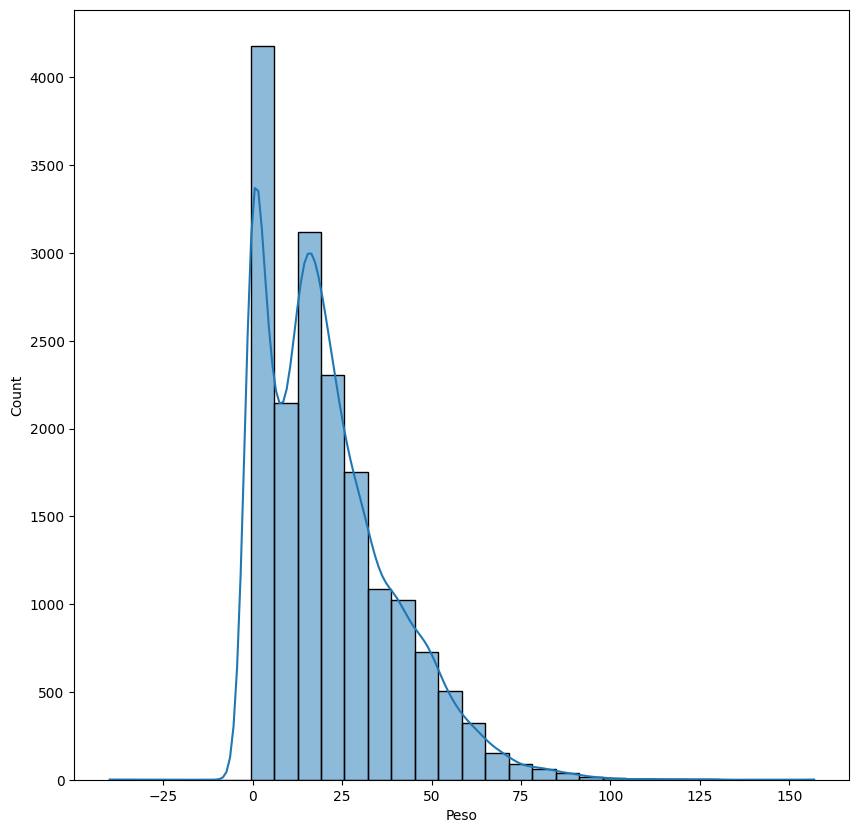

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.histplot(data['Peso'], bins=30, kde=True)

Temos valores de peso negativo, que indica claramente um erro. Vamos verificar esses valores e descobrir como vamos tratar.

In [7]:
# Cria uma série apenas com os valores igual ou abaixo de 0 de PESO

serie = data['Peso'][data['Peso'] <= 0]

serie

ID
3        0.0
16       0.0
26       0.0
49       0.0
65       0.0
        ... 
17838    0.0
17840    0.0
17844    0.0
17849    0.0
17856    0.0
Name: Peso, Length: 2610, dtype: float64

In [8]:
serie = data['Peso'][data['Peso'] < 0]

serie

ID
13629   -40.0
Name: Peso, dtype: float64

Enquanto os valores de 0 pode ser de algum erro de precisão (talvez ao pesar uma criança recém-nascida), o único valor negativo é um erro de entrada que estarei retirando do conjunto de dados.

In [9]:
# Remove os valores abaixo de 0 em Peso

data = data[data['Peso'] >= 0]

Vamos procurar correlacionar o peso com a altura, para verificar se é falta de coleta de dados ou apenas erro de precisão.

In [10]:
serie = data['Altura'][data['Peso'] == 0][data['Altura'] > 0]

serie.describe()

count    109.000000
mean     109.513761
std       34.734606
min       12.000000
25%       90.000000
50%      110.000000
75%      136.000000
max      180.000000
Name: Altura, dtype: float64

Dado que há vários valores de altura igual a 0 relacionados ao Peso 0 e como os valores não nulos variam entre 12 e 180cm, será considerado como dado não coletado e, portanto, será marcado como NaN. Para o caso do peso perderíamos muitos dados e como temos a variável IMC, podemos na análise do modelo descartar Peso e Altura e usar apenas o IMC.

## Análise da Altura

<Axes: xlabel='Altura', ylabel='Count'>

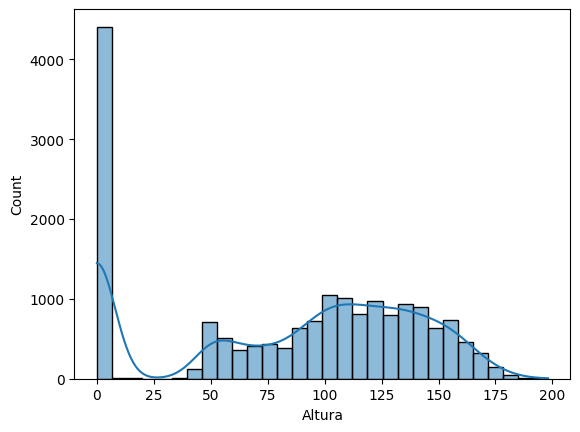

In [11]:
sns.histplot(data['Altura'], bins=30, kde=True)

In [12]:
serie = data['Altura'][data['Altura'] == 0]

serie

ID
3        0
13       0
16       0
21       0
22       0
        ..
17849    0
17855    0
17856    0
17863    0
17873    0
Name: Altura, Length: 4408, dtype: int64

Apesar de não haver valores nulos, há muitos valores não coletados. Vamos verificar se o IMC desses valores foram coletados.

In [13]:
serie = data['IMC'][data['Altura'] == 0]

serie

ID
3       NaN
13      NaN
16      NaN
21      NaN
22      NaN
         ..
17849   NaN
17855   NaN
17856   NaN
17863   NaN
17873   NaN
Name: IMC, Length: 4408, dtype: float64

Como esperado, não foram.

## Análise do IMC

<Axes: xlabel='IMC', ylabel='Count'>

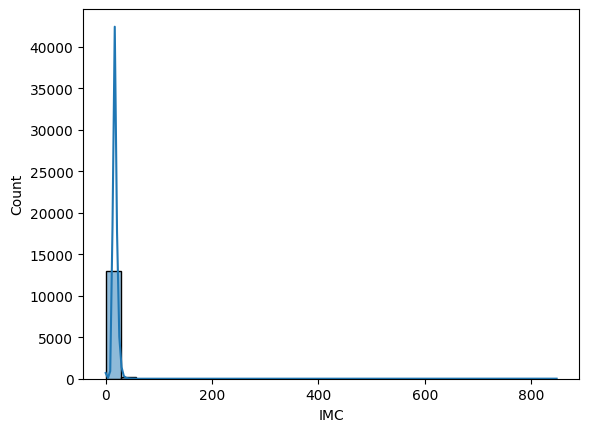

In [14]:
sns.histplot(data['IMC'], bins=30, kde=True)

<Axes: ylabel='IMC'>

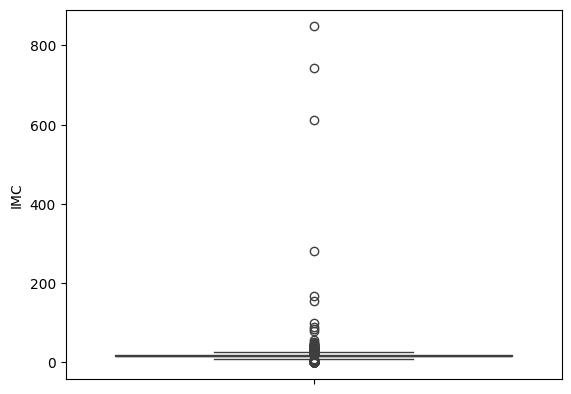

In [15]:
sns.boxplot(data['IMC'])

In [16]:
serie = data['IMC'][data['IMC'] > 100]

serie

ID
2285     281.0
4958     742.0
6746     612.0
7551     155.0
11042    848.0
11931    167.0
Name: IMC, dtype: float64

Irei considerar os valores maiores de 100 como outliers e erros, pois uma pessoa que pesa 1,60cm e tem 300kg teria 117 de IMC.

In [17]:
data[data['IMC'] > 100]

,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
ID,,,,,,,,,,,,,,,,,,,,
2285,27.0,31,281.0,20/05/04,16/08/94,10.13,GS,Normais,100.0,60.0,NaN,Normal,Normal,ausente,76,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro
4958,157.0,46,742.0,06/07/05,10/09/91,14.34,SB,Normais,110.0,80.0,NaN,Anormal,Normal,Sistólico,70,Assintomático,NaN,F,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
6746,22.1,19,612.0,17/07/07,06/07/00,7.29,CAMED,Normais,90.0,50.0,NaN,Normal,Normal,ausente,80,Assintomático,NaN,M,5 - Parecer cardiológico,5 - Cirurgia
7551,1.9,11,155.0,11/04/08,02/09/02,5.82,UR,Normais,100.0,60.0,NaN,Normal,Normal,ausente,100,Dispneia,Dor precordial,M,5 - Parecer cardiológico,NaN
11042,21.7,16,848.0,17/12/09,12/02/04,6.07,NaN,Normais,NaN,NaN,Não Calculado,Anormal,Hiperfonética,ausente,110,Desmaio/tontura,NaN,F,6 - Suspeita de cardiopatia,Outro
11931,47.0,53,167.0,22/09/05,NaN,NaN,NaN,Normais,85.0,60.0,#VALUE!,Normal,Normal,ausente,100,NaN,NaN,F,5 - Parecer cardiológico,5 - Cirurgia


In [18]:
def calcula_imc(peso, altura):
    return peso / (altura ** 2)

In [19]:
# Aplica o calcula IMC apenas nos valores que estão com IMC acima de 100

data['IMC'][data['IMC'] > 100] = calcula_imc(data['Peso'][data['IMC'] > 100], data['Altura'][data['IMC'] > 100])

C:\Users\danie\AppData\Local\Temp\ipykernel_18596\130796944.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['IMC'][data['IMC'] > 100] = calcula_imc(data['Peso'][data['IMC'] > 100], data['Altura'][data['IMC'] > 100])


<Axes: xlabel='IMC', ylabel='Count'>

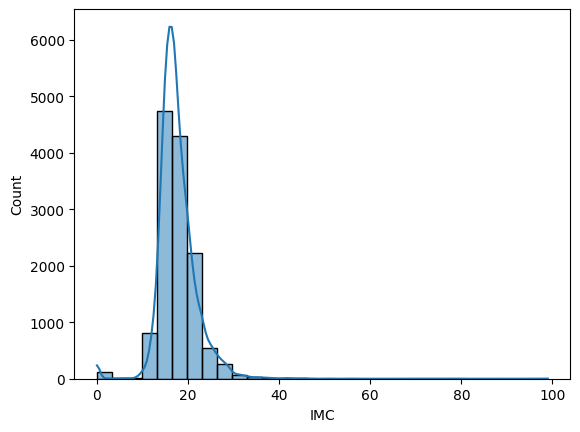

In [20]:
sns.histplot(data['IMC'], bins=30, kde=True)

In [21]:
data['IMC'].describe()

count    13146.000000
mean        17.592977
std          4.271546
min          0.000000
25%         15.000000
50%         17.000000
75%         19.000000
max         99.000000
Name: IMC, dtype: float64

In [22]:
# Vamos marcar os valores de IMC igual a 0 como NaN

data['IMC'][data['IMC'] == 0] = np.nan

C:\Users\danie\AppData\Local\Temp\ipykernel_18596\974663617.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['IMC'][data['IMC'] == 0] = np.nan
C:\Users\danie\AppData\Local\Temp\ipykernel_18596\974663617.py:3: SettingWithCopyWarning: 

Vamos tirar as colunas Altura e Peso dos dados a partir de agora.

In [23]:
data = data.drop('Peso', axis=1)
data = data.drop('Altura', axis=1)

data.head()

,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
ID,,,,,,,,,,,,,,,,,,
1,19.0,11/05/06,30/03/06,0.12,GS,Normais,NaN,NaN,Não Calculado,Anormal,Normal,Sistólico,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
2,14.0,25/05/05,19/05/05,0.02,GS,Normais,NaN,NaN,Não Calculado,Anormal,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
3,NaN,12/06/01,08/05/05,-4.05,SULA,Normais,NaN,NaN,Não Calculado,Anormal,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
4,19.0,15/10/09,21/04/09,0.5,NaN,Normais,NaN,NaN,Não Calculado,Anormal,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
5,20.0,23/01/09,24/10/99,9.6,Sulam,Normais,85.0,50.0,Normal,Anormal,Normal,ausente,90,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física


Vamos substituir os valores NaN no IMC pela moda.

In [24]:
# Substitui os valores nulos pela moda

data['IMC'] = data['IMC'].fillna(data['IMC'].mode()[0])

<Axes: xlabel='IMC', ylabel='Count'>

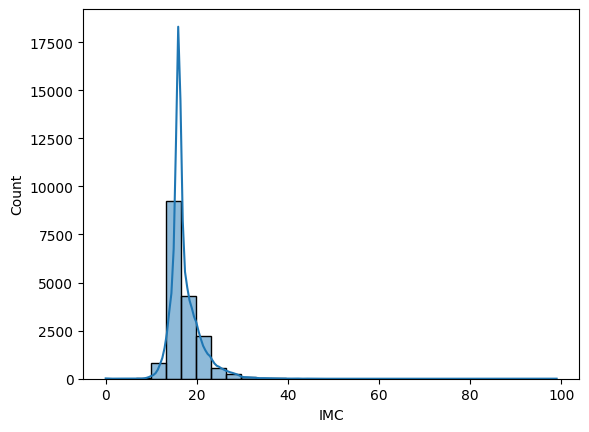

In [25]:
sns.histplot(data['IMC'], bins=30, kde=True)

## Entendendo IDADE

In [26]:
# Passa por cada um do termos da coluna "IDADE" e verifica quais são string

for i in data['IDADE']:
    try:
        float(i)
    except:
        print(i)

#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!


In [27]:
# Coloca os valores "#VALUE!" como NaN

data['IDADE'] = pd.to_numeric(data['IDADE'], errors='coerce')

In [28]:
data['IDADE'].describe()

count    16062.000000
mean         6.033612
std          7.830361
min       -113.180000
25%          2.220000
50%          5.670000
75%          9.990000
max         71.810000
Name: IDADE, dtype: float64

<Axes: xlabel='IDADE', ylabel='Count'>

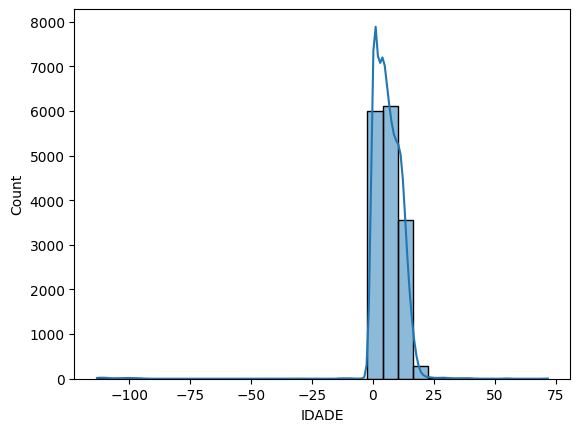

In [29]:
sns.histplot(data['IDADE'], bins=30, kde=True)

In [30]:
serie = data['IDADE'][data['IDADE'] < 0]

serie

ID
3         -4.05
590     -106.66
761       -0.18
943       -0.03
1214    -112.09
          ...  
17071     -0.75
17333     -0.54
17692     -0.13
17793    -96.32
17872    -24.03
Name: IDADE, Length: 118, dtype: float64

Vamos marcar esses valores negativos como NaN e depois substituir pela moda.

In [31]:
# Marca os valores negativos de IDADE como NaN

data['IDADE'][data['IDADE'] < 0] = np.nan

C:\Users\danie\AppData\Local\Temp\ipykernel_18596\278505585.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['IDADE'][data['IDADE'] < 0] = np.nan
C:\Users\danie\AppData\Local\Temp\ipykernel_18596\278505585.py:3: SettingWithCopyWarnin

In [32]:
# Marca os valores maiores que 19 como NaN

data['IDADE'][data['IDADE'] > 19] = np.nan

C:\Users\danie\AppData\Local\Temp\ipykernel_18596\4028094325.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['IDADE'][data['IDADE'] > 19] = np.nan
C:\Users\danie\AppData\Local\Temp\ipykernel_18596\4028094325.py:3: SettingWithCopyWar

In [33]:
data['IDADE'] = data['IDADE'].fillna(data['IDADE'].mode()[0])

In [34]:
data['IDADE'].describe()

count    17554.000000
mean         5.670970
std          4.778606
min          0.000000
25%          0.990000
50%          4.910000
75%          9.470000
max         18.910000
Name: IDADE, dtype: float64

<Axes: xlabel='IDADE', ylabel='Count'>

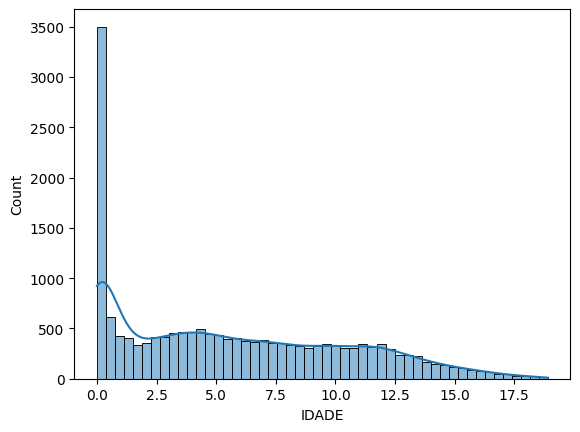

In [35]:
sns.histplot(data['IDADE'], bins=50, kde=True)

## Análise de Convenio

In [36]:
data['Convenio'].unique()

array(['GS', 'SULA', nan, 'Sulam', 'SAME', 'UR', 'Grupo', 'PART', 'SB',
       'SA', 'S.America', 'UG', 'Norclinicas', 'Camed', 'REAL S.',
       'Medial', 'SEMEPE', 'MEDIAL', 'CT', 'GRUPO', 'CC', 'S.A',
       'Norclínicas', 'Sul America', 'SUS', 'Funcef', 'SulAmerica',
       'Ideal', 'IDEAL', 'Sta Helena', 'Fusex', 'Real S.', 'Unibanco',
       '35971', 'REAL', 'Aeronáutica', 'Tabela', 'Viva', 'América',
       'NORCL', 'CAMED', 'NORCLIN', 'U.Recife', 'S.AM', 'Norcl',
       'ST.HELENA', 'BLSERV', 'Aero', 'Medserv', 'NORCLIN.', 'medial',
       'AERON.', 'Fachesf', 'FUSEX', 'Medservice', 'Real Saude', 'BLUELI',
       'MMS', 'ASL', 'MEDSERV', 'NORC', 'Norclínica', 'AS', 'CASSI',
       'Cassi', 'Unimed Recife', 'Semepe', 'Circulo', 'U G', 'Notredame',
       'América S.', 'Real', 'FUNCEF', 'CELPOS', 'UNIB.', 'Norclinica',
       'Saúde Recife', 'MEDIAl', 'S. RECIFE', 'Unimed Foratleza',
       'FACHESF', 'Sta. Clara', 'Sul Am', 'S. CX', 'same', 'MEDISERV.',
       'ASSEF', 'Fisco', 

Particularmente, não parece ser uma informação importante para se analisar. Da mesma forma que as datas.

## Análise de Pulsos

In [37]:
data['PULSOS'].unique()

array(['Normais', nan, 'NORMAIS', 'Outro', 'Amplos', 'AMPLOS',
       'Femorais diminuidos', 'Diminuídos '], dtype=object)

In [38]:
# Substiui NORMAIS por normais e AMPLOS por Amplos

data['PULSOS'] = data['PULSOS'].replace('NORMAIS', 'Normais')
data['PULSOS'] = data['PULSOS'].replace('AMPLOS', 'Amplos')

In [39]:
data['PULSOS'].value_counts()

PULSOS
Normais                16214
Amplos                    53
Outro                     41
Femorais diminuidos       37
Diminuídos                18
Name: count, dtype: int64

In [40]:
# Substitui os valores nulos pela moda

data['PULSOS'] = data['PULSOS'].fillna(data['PULSOS'].mode()[0])

data['PULSOS'].value_counts()

PULSOS
Normais                17405
Amplos                    53
Outro                     41
Femorais diminuidos       37
Diminuídos                18
Name: count, dtype: int64

## Análise de PPA

In [41]:
data['PPA'].unique()

array(['Não Calculado', 'Normal', 'Pre-Hipertensão PAS', 'HAS-2 PAS',
       'Pre-Hipertensão PAD', nan, '#VALUE!', 'HAS-1 PAS', 'HAS-2 PAD',
       'HAS-1 PAD'], dtype=object)

In [42]:
# Marca #VALUE! como NaN, sabendo que os valores são categóricos

data['PPA'] = data['PPA'].replace('#VALUE!', np.nan)

In [43]:
data['PPA'].value_counts()

PPA
Não Calculado          8922
Normal                 6005
Pre-Hipertensão PAD     227
HAS-2 PAS               211
Pre-Hipertensão PAS     190
HAS-1 PAS               153
HAS-1 PAD                84
HAS-2 PAD                57
Name: count, dtype: int64

Como seria muito ruim para a analisar substituir o Não Calculado e, da mesma fora, retirar ele eu deixarei assim.

In [44]:
# Substitui os valores nulos pela moda

data['PPA'] = data['PPA'].fillna(data['PPA'].mode()[0])

In [45]:
data['PPA'].value_counts()

PPA
Não Calculado          10627
Normal                  6005
Pre-Hipertensão PAD      227
HAS-2 PAS                211
Pre-Hipertensão PAS      190
HAS-1 PAS                153
HAS-1 PAD                 84
HAS-2 PAD                 57
Name: count, dtype: int64

## Análise de Patologia

In [46]:
data['NORMAL X ANORMAL'].unique()

array(['Anormal', 'Normal', nan, 'anormal', 'Normais'], dtype=object)

In [47]:
# Substitui "anormal" por "Anormal" e "Normais" por "Normal"

data['NORMAL X ANORMAL'] = data['NORMAL X ANORMAL'].replace('anormal', 'Anormal')
data['NORMAL X ANORMAL'] = data['NORMAL X ANORMAL'].replace('Normais', 'Normal')

In [48]:
data['NORMAL X ANORMAL'].value_counts()

NORMAL X ANORMAL
Normal     9840
Anormal    6554
Name: count, dtype: int64

In [49]:
# Conta quantos valores nulos tem

data['NORMAL X ANORMAL'].isnull().sum()

1160

Como este é o nosso label e vamos aplicar aprendizado de máquina supervisionado, para evitar enviasamento vamos remover os valores nulos.

In [50]:
# Remove os valores cuja coluna "NORMAL X ANORMAL" é nula

data = data.dropna(subset=['NORMAL X ANORMAL'])

## Análise de B2

In [51]:
data['B2'].unique()

array(['Normal', 'Desdob fixo', 'Outro', 'Hiperfonética', 'Única', nan],
      dtype=object)

In [52]:
# Substitui os valores nulos pela moda

data['B2'] = data['B2'].fillna(data['B2'].mode()[0])

In [53]:
data['B2'].value_counts()

B2
Normal           15695
Hiperfonética      328
Desdob fixo        187
Outro              101
Única               83
Name: count, dtype: int64

## Análise de Sopro

In [54]:
data['SOPRO'].unique()

array(['Sistólico', 'ausente', 'sistólico', 'contínuo', 'Contínuo',
       'diastólico', 'Sistolico e diastólico', nan], dtype=object)

In [55]:
# Substitui "sistólico" por "Sistólico"
data['SOPRO'] = data['SOPRO'].replace('sistólico', 'Sistólico')

# Substitui "contínuo" por "Contínuo"
data['SOPRO'] = data['SOPRO'].replace('contínuo', 'Contínuo')

# Substitui "diastólico" por "Diastólico"
data['SOPRO'] = data['SOPRO'].replace('diastólico', 'Diastólico')

# Substitui "sistólico + diastólico" por "Sistólico + Diastólico"
data['SOPRO'] = data['SOPRO'].replace('sistólico + diastólico', 'Sistólico + Diastólico')

# Substitui "ausente" por "Ausente"
data['SOPRO'] = data['SOPRO'].replace('ausente', 'Ausente')

In [56]:
# Substitui os valores nulos pela moda

data['SOPRO'] = data['SOPRO'].fillna(data['SOPRO'].mode()[0])

In [57]:
data['SOPRO'].value_counts()

SOPRO
Ausente                   10555
Sistólico                  5777
Contínuo                     48
Diastólico                   11
Sistolico e diastólico        3
Name: count, dtype: int64

## Análise de FC

In [58]:
data['FC'].unique()

array(['112', '128', '88', '92', '90', '100', '96', '80', '120', '110',
       '52', '95', '70', '78', '84', '85', '132', '76', '102', '72', nan,
       '74', '140', '68', '108', '136', '86', '60', '82', '75', '64',
       '130', '200', '124', '160', '94', '164', '152', '1120', '98',
       '150', '116', '104', '180', '156', '135', '123', '106', '300',
       '10', '115', '55', '65', '142', '170-150', '50', '134', '780',
       '92-100', '200-300', '62', '12', '198', '144', '140-150', '111',
       '148', '66', '83', '8096', '972', '56', '137', '126', '114', '122',
       '900', '125', '80-90', '182', '89', '58', '69', '170', '57', '801',
       '50-100', '79', '981', '165', '230', '138', '87', '93', '145',
       '133', '43', '1560', '156 a 168', '16', '146', '118', '214', '99',
       '65-100', '140-160', '194', '120-180', '48', '107', '60-100',
       '154', '97', '140-200', '109', '188', '192', '129', '140-120',
       '9288', '66-80', '81', '8', '105', '91', '120-160', '143', '73'

In [59]:
data['FC'].value_counts()

FC
80           2439
100          2017
90           1718
88           1193
96           1054
             ... 
133             1
43              1
1560            1
156 a 168       1
73              1
Name: count, Length: 127, dtype: int64

In [60]:
# Substitui os valores nulos pela moda

data['FC'] = data['FC'].fillna(data['FC'].mode()[0])

## Análise de HDA 1

In [61]:
data['HDA 1'].unique()

array(['Palpitacao', 'Dispneia', 'Assintomático', nan, 'Dor precordial',
       'Desmaio/tontura', 'Outro', 'Cianose', 'Ganho de peso'],
      dtype=object)

In [62]:
# Substitui os valores nulos pela moda

data['HDA 1'] = data['HDA 1'].fillna(data['HDA 1'].mode()[0])

In [63]:
data['HDA 1'].value_counts()

HDA 1
Assintomático      13296
Dor precordial       856
Dispneia             744
Palpitacao           563
Cianose              289
Desmaio/tontura      264
Outro                204
Ganho de peso        178
Name: count, dtype: int64

## Análise de HDA2

In [64]:
data['HDA2'].unique()

array([nan, 'Dispneia', 'Palpitacao', 'Desmaio/tontura', 'Ganho de peso',
       'Outro', 'Dor precordial', 'Assintomático', 'Cianose'],
      dtype=object)

In [65]:
# Substitui os valores nulos pela moda

data['HDA2'] = data['HDA2'].fillna(data['HDA2'].mode()[0])

In [66]:
data['HDA2'].value_counts()

HDA2
Palpitacao         15912
Dispneia             133
Dor precordial        95
Cianose               81
Desmaio/tontura       75
Outro                 63
Ganho de peso         34
Assintomático          1
Name: count, dtype: int64

## Análise de SEXO

In [67]:
data['SEXO'].unique()

array(['M', 'F', 'Indeterminado', nan, 'Masculino', 'Feminino',
       'masculino'], dtype=object)

In [68]:
# Substitui 'M' por 'Masculino' e 'F' por 'Feminino'

data['SEXO'] = data['SEXO'].replace('M', 'Masculino')
data['SEXO'] = data['SEXO'].replace('F', 'Feminino')

In [69]:
data['SEXO'].unique()

array(['Masculino', 'Feminino', 'Indeterminado', nan, 'masculino'],
      dtype=object)

In [70]:
# Substitui "masculino" por "Masculino"

data['SEXO'] = data['SEXO'].replace('masculino', 'Masculino')

data['SEXO'].unique()

array(['Masculino', 'Feminino', 'Indeterminado', nan], dtype=object)

In [71]:
data['SEXO'].value_counts()

SEXO
Masculino        9181
Feminino         6549
Indeterminado     660
Name: count, dtype: int64

In [72]:
# Substitui os valores nulos pela moda

data['SEXO'] = data['SEXO'].fillna(data['SEXO'].mode()[0])

data['SEXO'].value_counts()

SEXO
Masculino        9185
Feminino         6549
Indeterminado     660
Name: count, dtype: int64

## Análise de MOTIVO1

In [73]:
data['MOTIVO1'].value_counts()

MOTIVO1
5 - Parecer cardiológico           7719
6 - Suspeita de cardiopatia        5572
1 - Cardiopatia já estabelecida    1361
2 - Check-up                       1008
7 - Outro                           419
Name: count, dtype: int64

In [74]:
# Substitui os valores nulos pela moda

data['MOTIVO1'] = data['MOTIVO1'].fillna(data['MOTIVO1'].mode()[0])

data['MOTIVO1'].value_counts()

MOTIVO1
5 - Parecer cardiológico           8034
6 - Suspeita de cardiopatia        5572
1 - Cardiopatia já estabelecida    1361
2 - Check-up                       1008
7 - Outro                           419
Name: count, dtype: int64

## Análise de MOTIVO2

In [75]:
data['MOTIVO2'].value_counts()

MOTIVO2
5 - Cirurgia                           4059
6 - Sopro                              2861
1 - Cardiopatia congenica              1203
5 - Atividade física                   1050
Outro                                  1029
6 - Dor precordial                      614
6 - Palpitação/taquicardia/arritmia     561
6 - HAS/dislipidemia/obesidade          402
6 - Dispnéia                            312
6 - Cianose                             156
1 - Cardiopatia adquirida               127
6 - Cardiopatia na familia               49
6 - Cansaço                              17
5 - Uso de cisaprida                      9
6 - Alterações de pulso/perfusão          5
6 - Cianose e dispnéia                    3
Name: count, dtype: int64

Podemos verificar que:

- 1: Cardiopatias congênitas ou adquiridas
- 5: Motivos relacionados a cirurgia, atividade física ou uso de medicamentos (como cisaprida)
- 6: Sintomas ou fatores de risco cardiovasculares (como sopro, dor precordial, palpitações, hipertensão arterial, etc.)

Logo, vamos agrupar por grupo.

In [76]:
def agrupa_motivo(motivo):
    if '1' in motivo:
        return 'Grupo 1'
    if '2' in motivo:
        return 'Grupo 2'
    if '3' in motivo:
        return 'Grupo 3'
    if '4' in motivo:
        return 'Grupo 4'
    if '5' in motivo:
        return 'Grupo 5'
    if '6' in motivo:
        return 'Grupo 6'
    if '7' in motivo:
        return 'Grupo 7'

In [77]:
# Aplica a função agrupa_motivo em cada um dos valores da coluna MOTIVO2 que não são nulos 

data['MOTIVO2'] = data['MOTIVO2'].apply(lambda x: agrupa_motivo(x) if pd.notnull(x) else x)

In [78]:
data['MOTIVO2'].value_counts()

MOTIVO2
Grupo 5    5118
Grupo 6    4980
Grupo 1    1330
Name: count, dtype: int64

In [79]:
# Aplica em "MOTIVO1"

data['MOTIVO1'] = data['MOTIVO1'].apply(lambda x: agrupa_motivo(x) if pd.notnull(x) else x)

data['MOTIVO1'].value_counts()

MOTIVO1
Grupo 5    8034
Grupo 6    5572
Grupo 1    1361
Grupo 2    1008
Grupo 7     419
Name: count, dtype: int64

In [80]:
# Substitui os valores nulos pela moda em ambos

data['MOTIVO1'] = data['MOTIVO1'].fillna(data['MOTIVO1'].mode()[0])
data['MOTIVO2'] = data['MOTIVO2'].fillna(data['MOTIVO2'].mode()[0])

In [81]:
data['MOTIVO1'].value_counts()

MOTIVO1
Grupo 5    8034
Grupo 6    5572
Grupo 1    1361
Grupo 2    1008
Grupo 7     419
Name: count, dtype: int64

In [82]:
data['MOTIVO2'].value_counts()

MOTIVO2
Grupo 5    10084
Grupo 6     4980
Grupo 1     1330
Name: count, dtype: int64

## Eliminando Duplicatas

In [83]:
data = data.drop(columns=['Atendimento', 'DN', 'Convenio', 'PA SISTOLICA', "PA DIASTOLICA"])

In [84]:
# Verifica se há valores duplicados

data.duplicated().sum()

551

In [85]:
# Remove os valores duplicados

data = data.drop_duplicates()

# Salvando o .csv

In [86]:
# Salva os dados como "UCMF_limpo.csv"

data.to_csv('data/UCMF_limpo.csv')